<a href="https://colab.research.google.com/github/tasdid25/Machine-learning/blob/main/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Problem

In [ ]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load Dataset

In [ ]:
df  = pd.read_csv('student_marks.csv')

In [ ]:
df

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19
...,...,...
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05


In [ ]:
df.shape

(200, 2)

## Discover and visualize the data to gain insights

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [ ]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


Text(0.5, 1.0, 'Scatter Plot of Students Study Hours vs Students marks')

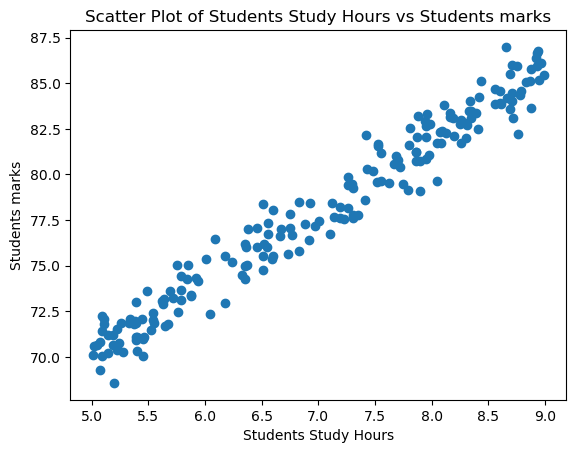

In [ ]:
plt.scatter(df.study_hours, df.student_marks)
plt.xlabel("Students Study Hours")
plt.ylabel("Students marks")
plt.title("Scatter Plot of Students Study Hours vs Students marks")

## Prepare the data for Machine Learning algorithms

In [ ]:
# Data Cleaning

In [ ]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [ ]:
df.study_hours.mean()

6.9959487179487185

In [ ]:
df2 = df.fillna(df.study_hours.mean())

In [ ]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [ ]:
# split dataset

In [ ]:
X = df2.drop("student_marks", axis = "columns")
#X = df2.study_hours
y = df2.student_marks

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2) #, random_state=51

In [ ]:
X_train

,study_hours
190,5.79
167,5.07
102,8.26
15,6.55
195,7.53
...,...
197,8.94
150,5.39
71,5.11
13,7.90


In [ ]:
y_train

190    73.14
167    70.79
102    82.99
15     76.03
195    81.67
       ...  
197    86.75
150    71.87
71     71.79
13     80.76
149    86.12
Name: student_marks, Length: 160, dtype: float64

In [ ]:
X_test

,study_hours
97,5.20
84,6.88
138,8.71
83,6.01
32,5.40
178,8.42
103,7.31
58,5.39
7,8.99
132,6.83


In [ ]:
y_test

97     68.57
84     77.29
138    85.98
83     75.36
32     71.10
178    84.24
103    79.26
58     70.90
7      85.46
132    75.80
54     82.21
6      76.99
137    71.22
80     84.00
39     83.23
95     76.48
199    83.50
147    74.34
183    83.87
152    81.70
115    74.44
59     71.70
49     71.41
68     69.27
0      78.50
42     71.10
198    78.05
193    79.64
153    70.78
65     70.06
61     79.41
192    84.03
47     70.11
163    77.07
20     82.18
189    79.87
179    78.17
19     80.58
124    83.57
18     82.50
Name: student_marks, dtype: float64

# Select a model and train it

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([3.88053494])

In [ ]:
lr.intercept_

50.7800939602552

In [ ]:
m = 3.88053494
c = 50.7800939602552
z  = m * 40 + c
z

206.0014915602552

In [ ]:
lr.predict([[40]])

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([206.00149164])

In [ ]:
y_pred  = lr.predict(X_test)
y_pred

array([70.95887566, 77.47817436, 84.57955331, 74.10210896, 71.73498265,
       83.45419817, 79.14680439, 71.6961773 , 85.66610309, 77.28414761,
       84.77358005, 76.66326202, 70.72604356, 83.14375538, 81.3587093 ,
       74.41255176, 83.18256073, 73.75286082, 84.19149981, 82.13481629,
       73.24839127, 72.70511638, 70.53201682, 70.45440612, 77.28414761,
       71.96781474, 76.39162458, 80.07813277, 71.11409706, 71.92900939,
       78.95277764, 84.57955331, 70.22157402, 76.97370482, 79.57366323,
       78.95277764, 78.95277764, 80.54379697, 84.50194261, 83.41539282])

In [ ]:
temp = np.c_[X_test, y_test, y_pred] #np.c_ is a function in NumPy that allows you to concatenate arrays along the second axis (column-wise)
temp

array([[ 5.2       , 68.57      , 70.95887566],
       [ 6.88      , 77.29      , 77.47817436],
       [ 8.71      , 85.98      , 84.57955331],
       [ 6.01      , 75.36      , 74.10210896],
       [ 5.4       , 71.1       , 71.73498265],
       [ 8.42      , 84.24      , 83.45419817],
       [ 7.31      , 79.26      , 79.14680439],
       [ 5.39      , 70.9       , 71.6961773 ],
       [ 8.99      , 85.46      , 85.66610309],
       [ 6.83      , 75.8       , 77.28414761],
       [ 8.76      , 82.21      , 84.77358005],
       [ 6.67      , 76.99      , 76.66326202],
       [ 5.14      , 71.22      , 70.72604356],
       [ 8.34      , 84.        , 83.14375538],
       [ 7.88      , 83.23      , 81.3587093 ],
       [ 6.09      , 76.48      , 74.41255176],
       [ 8.35      , 83.5       , 83.18256073],
       [ 5.92      , 74.34      , 73.75286082],
       [ 8.61      , 83.87      , 84.19149981],
       [ 8.08      , 81.7       , 82.13481629],
       [ 5.79      , 74.44      , 73.248

In [ ]:
pd.DataFrame(data = np.c_[X_test, y_test, y_pred], columns = ["study_hours", "student_marks_original","student_marks_predicted"])

,study_hours,student_marks_original,student_marks_predicted
0,5.20,68.57,70.958876
1,6.88,77.29,77.478174
2,8.71,85.98,84.579553
3,6.01,75.36,74.102109
4,5.40,71.10,71.734983
5,8.42,84.24,83.454198
6,7.31,79.26,79.146804
7,5.39,70.90,71.696177
8,8.99,85.46,85.666103
9,6.83,75.80,77.284148


## Fine-tune your model/ Accuracy test

In [ ]:
lr.score(X_test,y_test) #accuracy

0.9512901548032682

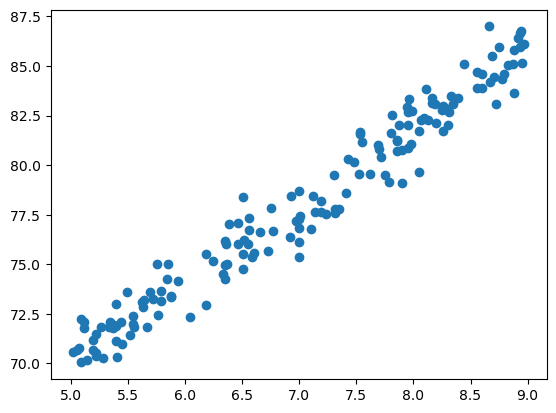

In [ ]:
plt.scatter(X_train,y_train)

In [ ]:
lr.predict(X_train)

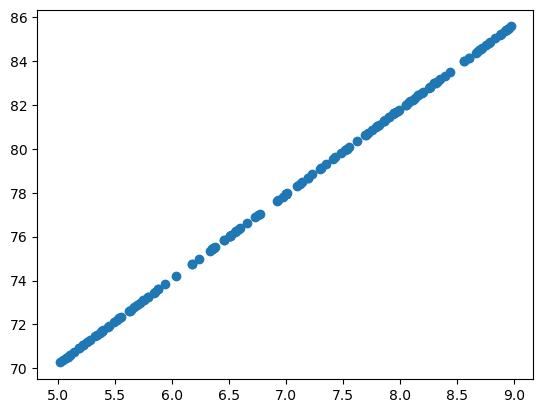

In [ ]:
plt.scatter(X_train, lr.predict(X_train))

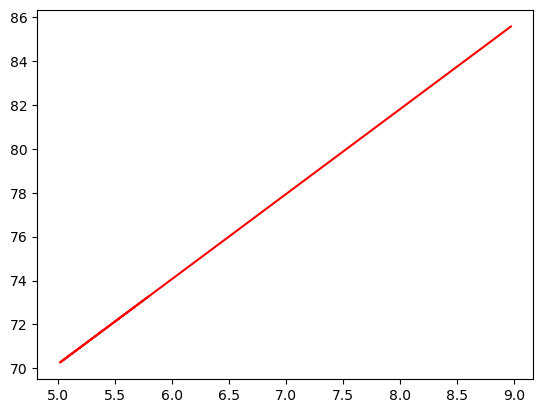

In [ ]:
plt.plot(X_train, lr.predict(X_train), 'r-')

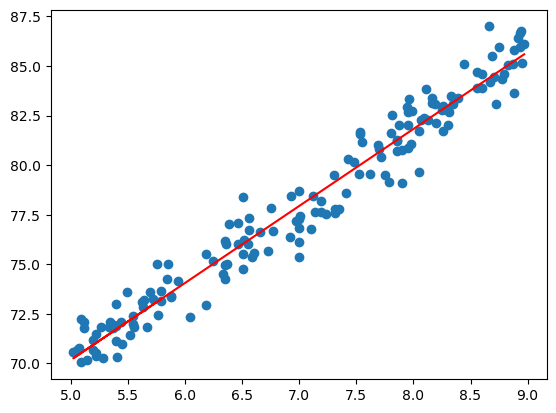

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, lr.predict(X_train), color = "r")

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(X_test, lr.predict(X_test), color = "r")

In [ ]:
plt.scatter(X, y)
plt.plot(X, lr.predict(X), color = "r")